In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

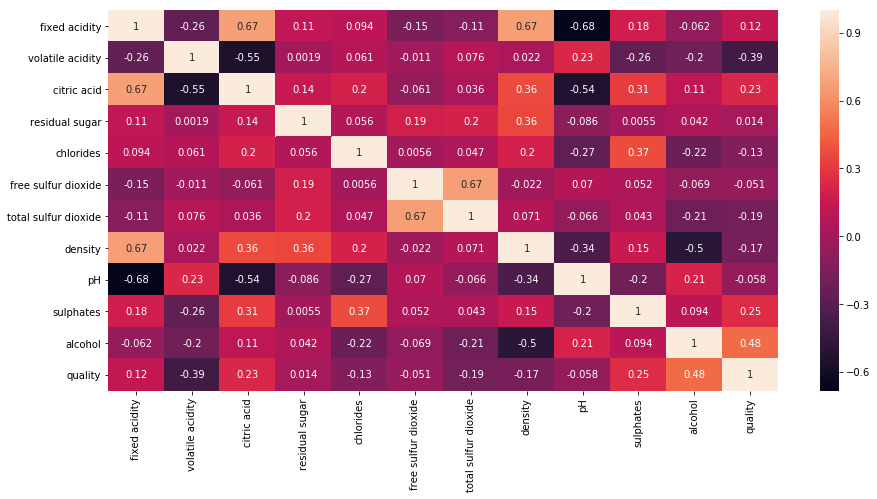

In [7]:
corr=red.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

### i figured that the highest correlation with Quality is (alcohol,sulphates,citric acid, and fixed acidity )

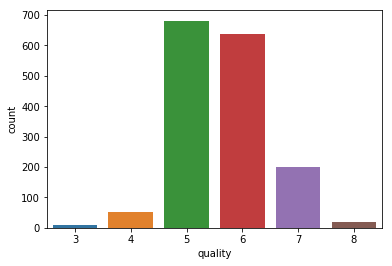

In [8]:
sns.countplot(red['quality'])

### i am going to make 2 classes only (0,1) for good and bad

In [9]:
X=red.drop('quality',axis=1)

In [10]:
y=red['quality']

In [17]:
y_2=(y>2).astype(int)

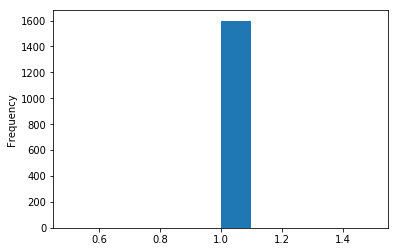

In [19]:
y_2.plot.hist()

In [20]:
y_3=(y>3).astype(int)

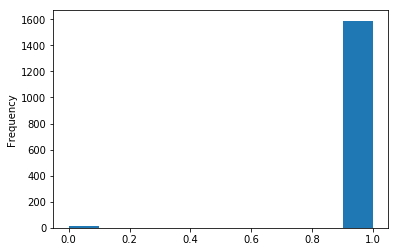

In [22]:
y_3.plot.hist()

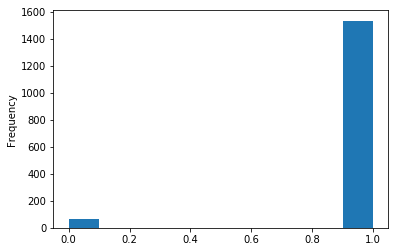

In [23]:
y_4=(y>4).astype(int)
y_4.plot.hist()

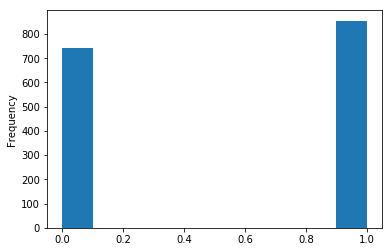

In [24]:
y_5=(y>5).astype(int)
y_5.plot.hist()

### after trying values so the most good one is 5

In [25]:
from sklearn.cross_validation import train_test_split

In [27]:
seed=8
X_train, X_test, y_train, y_test = train_test_split(X,y_5, test_size=0.33, random_state=seed)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(random_state=seed)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [31]:
rfc_pred=rfc.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [37]:
print("Accuracy Score of RandomForestClassifier: ",round(accuracy_score(y_test,rfc_pred)*100,2))

Accuracy Score of RandomForestClassifier:  79.73


In [39]:
from sklearn.linear_model import LogisticRegression

In [41]:
lgm=LogisticRegression(random_state=seed)

In [42]:
lgm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
lgm_pred=lgm.predict(X_test)

In [44]:
print("Accuracry score of LogisticRegression is : ",round(accuracy_score(y_test,lgm_pred)*100,2))

Accuracry score of LogisticRegression is :  75.0


### as the highest accuracy achieved by RandomForestClassifier Model, i am going to evaluate model

In [45]:
from sklearn.model_selection import  GridSearchCV

In [49]:
grid_values={'n_estimators':[50,100,150,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_rf = GridSearchCV(rfc,param_grid=grid_values,scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
best_param=grid_rf.best_params_
best_param

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [51]:
rfc=RandomForestClassifier(random_state=seed,max_depth=15,min_samples_leaf=1,n_estimators=100)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [53]:
rfc_pred=rfc.predict(X_test)

In [54]:
print("Accuracy Score of RandomForestClassifier: ",round(accuracy_score(y_test,rfc_pred)*100,2))

Accuracy Score of RandomForestClassifier:  81.25
